<a href="https://colab.research.google.com/github/Albieri-Ray/Banco_BBVA/blob/main/ejercicios_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Ejercicio 1**

El fichero flight.xlsx, que puedes descargar de Aula Global, contiene información sobre los pasajeros de un vuelo. Escribir un programa con los siguientes requisitos:

1.  Generar un DataFrame con los datos del fichero
2.  Mostrar por pantalla las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas, los tipos de datos de las columnas, las 10 primeras filas y las 10 últimas filas
3. Crear un segundo DataFrame que contenga las filas pares del DataFrame inicial
4. Eliminar del DataFrame los pasajeros con edad (columna `age`) desconocida (valor nulo)
5. Añadir una nueva columna booleana llamada `young` inmediatamente después de la columna 'age', que indique si el pasajero es menor de edad o no




In [121]:
import pandas as pd

# lectura del flight
titanic = pd.read_excel('/content/flight.xlsx', sheet_name='titanic3')

# se muestra el dataframe
print(titanic.head())
# dimensiones del dataframe
print(titanic.shape)
# número de datos
print(titanic.size)
# Nombres de columnas
print(titanic.columns.tolist())
# Nombres de filas
print(titanic.index.tolist())
# ver tipos de datos
print(titanic.dtypes)
# Primeras 10 filas
print(titanic.head(10))
# Últimas 10 filas
print(titanic.tail(10))
partitanic = titanic[titanic.index %2 ==0]
print(partitanic)

partitanic = partitanic.dropna(subset=['age'])
# valido
#partitanic['age'].isnull().sum()
# Agregar young
partitanic.insert(partitanic.columns.get_loc('age') + 1, 'young', partitanic['age'] < 18)



   class                                             name     sex   age  \
0      1                    Allen, Miss. Elisabeth Walton  female  29.0   
1      1                   Allison, Master. Hudson Trevor    male   1.0   
2      1                     Allison, Miss. Helen Loraine  female   2.0   
3      1             Allison, Mr. Hudson Joshua Creighton    male  30.0   
4      1  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female  25.0   

  ticket_number embarked                        home.dest  
0         24160        S                     St Louis, MO  
1        113781        S  Montreal, PQ / Chesterville, ON  
2        113781        S  Montreal, PQ / Chesterville, ON  
3        113781        S  Montreal, PQ / Chesterville, ON  
4        113781        S  Montreal, PQ / Chesterville, ON  
(1309, 7)
9163
['class', 'name', 'sex', 'age', 'ticket_number', 'embarked', 'home.dest']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 2

**Ejercicio 2**

El fichero cotizacion.xlsx contiene las cotizaciones de las empresas del IBEX35 con las siguientes columnas: nombre (nombre de la empresa), Final (precio de la acción al cierre de bolsa), Máximo (precio máximo de la acción durante la jornada), Mínimo (precio mínimo de la acción durante la jornada), volumen (Volumen al cierre de bolsa), Efectivo (capitalización al cierre en miles de euros). Esribir un programa que genere un DataFrame con el mínimo, el máximo y la media de cada columna.

Ejemplo de salida:

```
           Final    Maximo    Minimo      Volumen   Efectivo
Minimo      1.02      4.07      1.02        67.71    2343.09
Maximo  19705.00  19875.00  19675.00  36129692.00  145765.44
Media    2796.77   3170.11   3136.51   4244699.05   31767.78
```



In [65]:
# lectura de cotizacion
cotizacion = pd.read_excel('/content/cotizacion.xlsx', sheet_name='cotizacion')

# ver dataFrame
cotizacion.head()

# Calcular el mínimo, máximo y media de las columnas relevantes
minimos = cotizacion[['Final', 'Máximo', 'Mínimo', 'Volumen', 'Efectivo']].min()
maximos = cotizacion[['Final', 'Máximo', 'Mínimo', 'Volumen', 'Efectivo']].max()
medias = cotizacion[['Final', 'Máximo', 'Mínimo', 'Volumen', 'Efectivo']].mean()

# Crear un nuevo DataFrame con los resultados
df_estadisticas = pd.DataFrame({
    'Final': [minimos['Final'], maximos['Final'], medias['Final']],
    'Máximo': [minimos['Máximo'], maximos['Máximo'], medias['Máximo']],
    'Mínimo': [minimos['Mínimo'], maximos['Mínimo'], medias['Mínimo']],
    'Volumen': [minimos['Volumen'], maximos['Volumen'], medias['Volumen']],
    'Efectivo': [minimos['Efectivo'], maximos['Efectivo'], medias['Efectivo']]
}, index=['Mínimo', 'Máximo', 'Media'])

# Mostrar el DataFrame con las estadísticas
df_estadisticas.round(2)


,Final,Máximo,Mínimo,Volumen,Efectivo
Mínimo,1.02,4.07,1.02,67.71,2343.09
Máximo,19705.00,19875.00,19675.00,36129692.00,145765.44
Media,2796.77,3170.11,3136.51,4244699.05,31767.78


**Ejercicio 3**

Descarga el fichero ejercicio.xlsx que está en Aula Global y añádelo a tus archivos de Google Colab.

Este fichero contiene información de la evaluación de los alumnos en la asignatura de programación. Está
formado por las columnas Apellido, Nombre, Grupos, Parcial 1, Parcial 2, Proyecto y Examen final. “Grupo” es
un string que indica el grupo al que pertenecen (ESP1, ESP2, BIL), y “Parcial 1”, “Parcial 2”, “Proyecto” y
“Examen final” contienen un valor numérico que indica la puntuación obtenida en cada una de las pruebas.

Se pide:

1. Leer el fichero para la almacenar la información en un dataframe.

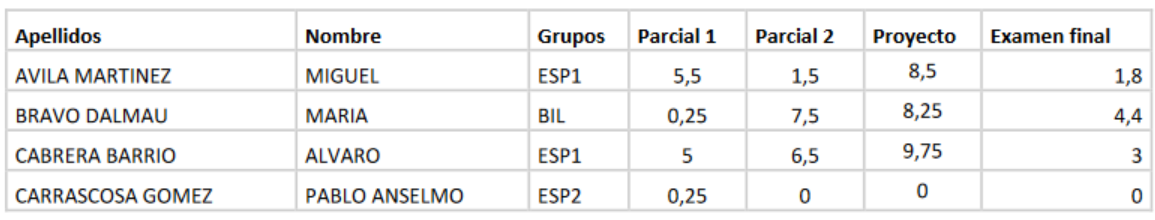



In [66]:
# lectura de ejercicio
df_ejercicio = pd.read_excel('/content/ejercicio.xlsx')

# Leer el fichero
df_ejercicio.head()


,Apellidos,Nombre,Grupos,Parcial 1,Parcial 2,Proyecto,Examen final
0,AVILA MARTINEZ,MIGUEL,ESP1,5.50,1.5,8.50,1.8
1,BRAVO DALMAU,MARIA,BIL,0.25,7.5,8.25,4.4
2,CABRERA BARRIO,ALVARO,ESP1,5.00,6.5,9.75,3.0
3,CARRASCOSA GOMEZ,PABLO ANSELMO,ESP2,0.25,0.0,0.00,0.0
4,CHAPINAL DE GRADO,ALVARO,ESP1,5.00,6.5,7.50,5.1


2. Añadir una nueva columna “Continua” que contenga la nota de la evaluación continua. Esta columna estará situada entre las columnas “Proyecto” y “Examen final” y su valor será la suma del 15% de la nota de “Parcial 1”, el 15% de la nota de “Parcial 2” y el 30% de la nota de “Proyecto”. Intenta implementar una extracción automática de las columnas, i.e., no renombres a mano el nombre de
las columnas para introducir la nueva. Ejemplo:

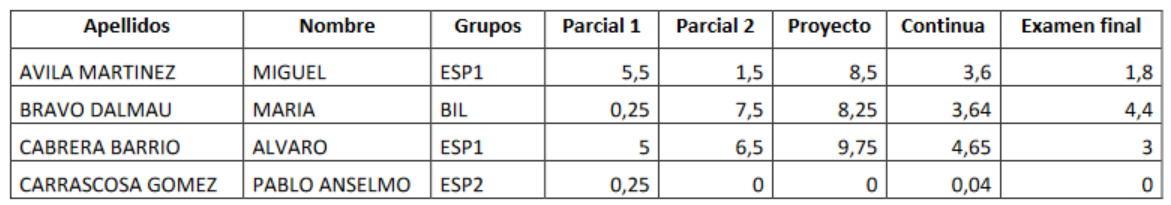

In [67]:
# calcular la nota de evaluación continua
df_ejercicio['Continua'] = round((0.15 * df_ejercicio['Parcial 1']) + (0.15 * df_ejercicio['Parcial 2']) + (0.30 * df_ejercicio['Proyecto']),2)

# reordenar las columnas para colocar la columna "Continua" entre "Proyecto" y "Examen final"
columnas = df_ejercicio.columns.tolist()
indice_proyecto = columnas.index('Proyecto')
columna_continua_eliminada =  columnas.pop(columnas.index('Continua'))
columnas.insert(indice_proyecto + 1, columna_continua_eliminada)
df_ejercicio = df_ejercicio[columnas]

# Mostrar el DataFrame actualizado
df_ejercicio.head()


,Apellidos,Nombre,Grupos,Parcial 1,Parcial 2,Proyecto,Continua,Examen final
0,AVILA MARTINEZ,MIGUEL,ESP1,5.50,1.5,8.50,3.60,1.8
1,BRAVO DALMAU,MARIA,BIL,0.25,7.5,8.25,3.64,4.4
2,CABRERA BARRIO,ALVARO,ESP1,5.00,6.5,9.75,4.65,3.0
3,CARRASCOSA GOMEZ,PABLO ANSELMO,ESP2,0.25,0.0,0.00,0.04,0.0
4,CHAPINAL DE GRADO,ALVARO,ESP1,5.00,6.5,7.50,3.98,5.1


3. Añadir dos nuevas columnas “Nota final” y “Aprobado”. Nota final se calcula de la siguiente forma: tomará un valor de 4.5 si la nota de “Examen final” es menor que 4; en otro caso, el valor será la suma de “Continua” más el 40% de “Examen final”. Si el valor de “Nota final” es mayor o igual a 5, a la columna “Aprobado” se le asignará el string “si”; en caso contrario se le asignará un “no”.

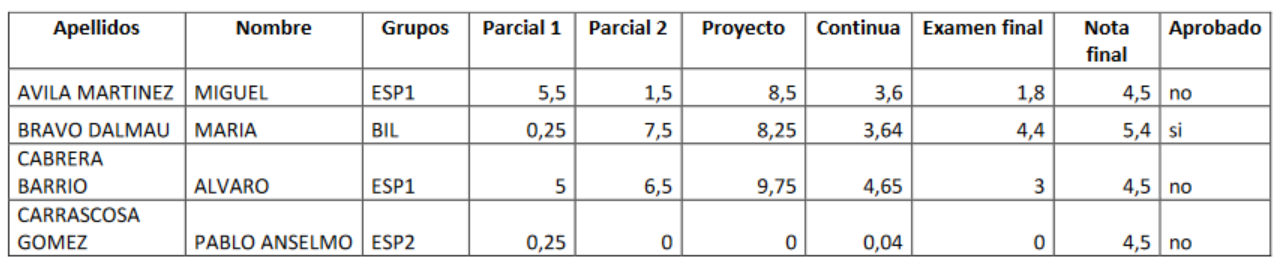


In [68]:
# columna nota final
df_ejercicio['Nota final'] = df_ejercicio.apply(lambda row: 4.5 if row['Examen final'] < 4 else row['Continua'] + 0.40 * row['Examen final'], axis=1)

# columna aprobado
df_ejercicio['Aprobado'] = df_ejercicio['Nota final'].apply(lambda x: 'sí' if x >= 5 else 'no')

# ver resultado
df_ejercicio.head()

,Apellidos,Nombre,Grupos,Parcial 1,Parcial 2,Proyecto,Continua,Examen final,Nota final,Aprobado
0,AVILA MARTINEZ,MIGUEL,ESP1,5.50,1.5,8.50,3.60,1.8,4.50,no
1,BRAVO DALMAU,MARIA,BIL,0.25,7.5,8.25,3.64,4.4,5.40,sí
2,CABRERA BARRIO,ALVARO,ESP1,5.00,6.5,9.75,4.65,3.0,4.50,no
3,CARRASCOSA GOMEZ,PABLO ANSELMO,ESP2,0.25,0.0,0.00,0.04,0.0,4.50,no
4,CHAPINAL DE GRADO,ALVARO,ESP1,5.00,6.5,7.50,3.98,5.1,6.02,sí


4. Reordena la tabla final de mayor a menos en función de “Nota final” e imprime las 10 primeras y últimas entradas de la tabla. Ejemplo salida:

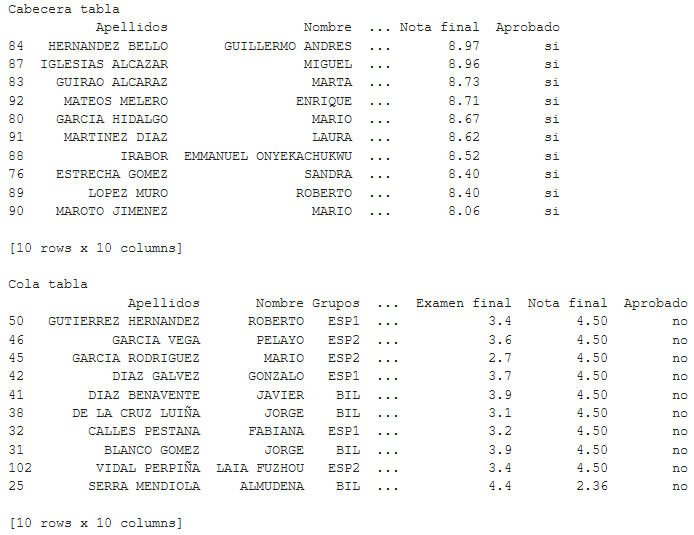

In [69]:
# Ordenado de mayor a menor
Tabla_Final = df_ejercicio.sort_values(by='Nota final', ascending=False)

print("10 primeras")
print(Tabla_Final.head())
print("\n10 ultimas")
print(Tabla_Final.tail())

10 primeras
           Apellidos            Nombre Grupos  Parcial 1  Parcial 2  Proyecto  \
84   HERNANDEZ BELLO  GUILLERMO ANDRES    BIL       8.30       10.0      9.70   
87  IGLESIAS ALCAZAR            MIGUEL   ESP2       9.80        9.0      9.25   
83    GUIRAO ALCARAZ             MARTA   ESP2       8.00       10.0      9.70   
92     MATEOS MELERO           ENRIQUE   ESP2       8.75       10.0      9.25   
80    GARCIA HIDALGO             MARIO   ESP2       9.60       10.0      9.50   

    Continua  Examen final  Nota final Aprobado  
84      5.65           8.3        8.97       sí  
87      5.60           8.4        8.96       sí  
83      5.61           7.8        8.73       sí  
92      5.59           7.8        8.71       sí  
80      5.79           7.2        8.67       sí  

10 ultimas
            Apellidos       Nombre Grupos  Parcial 1  Parcial 2  Proyecto  \
38   DE LA CRUZ LUIÑA        JORGE    BIL       4.75       8.50     10.00   
32     CALLES PESTANA      FABIANA 

5. Exporta el dataframe a un archivo Excel llamado programación_2024.xlsx.

In [70]:
# Exporta tabla final
Tabla_Final.to_excel('programacion_2024.xlsx', index=False)

6.  Genera un histograma que muestre el número de alumnos por grupo. Ejemplo:

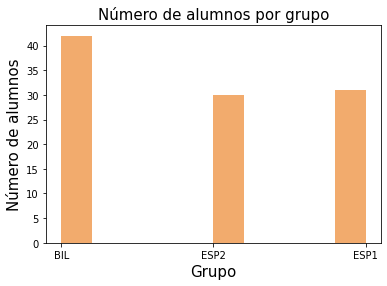

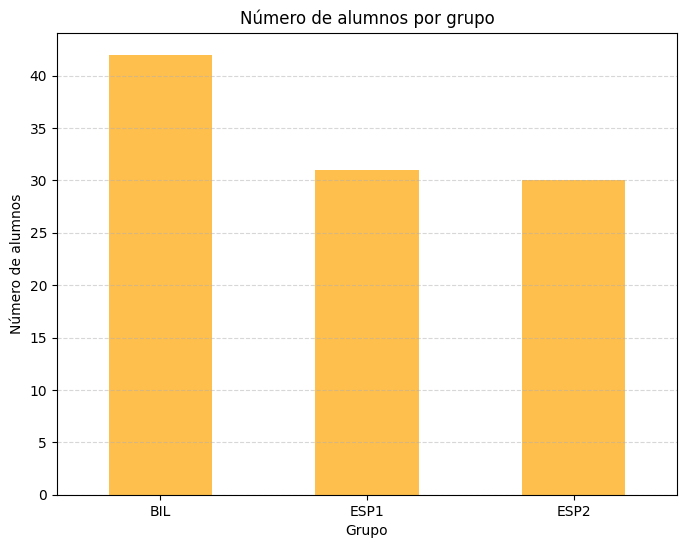

In [130]:
import matplotlib.pyplot as plt

# Contar la cant de alumnos por grupo
contar_grupos = Tabla_Final['Grupos'].value_counts()

# crear el histograma
plt.figure(figsize=(8, 6))
contar_grupos.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Número de alumnos por grupo')
plt.xlabel('Grupo')
plt.ylabel('Número de alumnos')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# visualizar
plt.show()

7. Genera un gráfico de queso que muestre el % de aprobados y suspensos por grupo. Ejemplo:

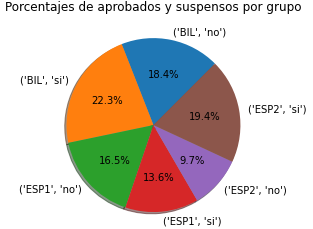

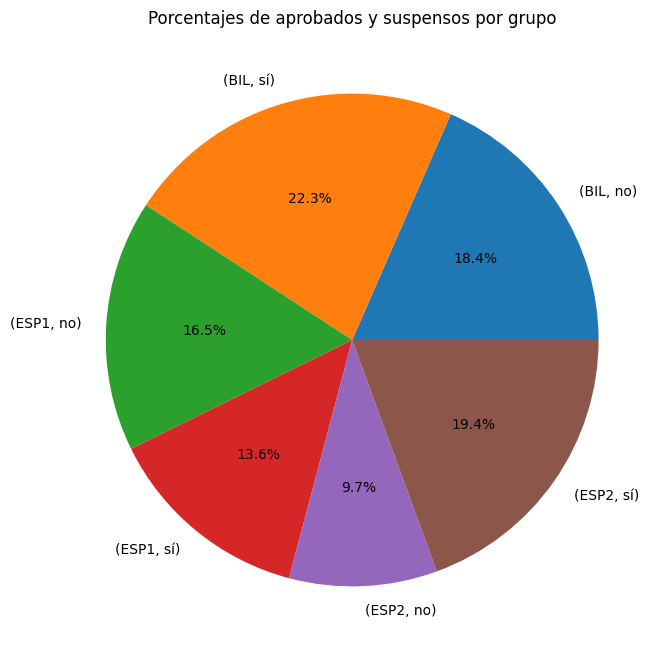

In [84]:
# Contar la cant. de aprobados y suspensos por grupo
conteo_aprobados_suspensos = Tabla_Final.groupby(['Grupos', 'Aprobado']).size()

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
conteo_aprobados_suspensos.plot(kind='pie', autopct='%1.1f%%')
plt.title('Porcentajes de aprobados y suspensos por grupo')

# visualizar
plt.show()